In [5]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)
from elasticsearch import Elasticsearch
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [6]:
client = Elasticsearch()

#query para obtener todos los tags
query_tags = {
  "aggs": {
    "my_aggregation": {
      "terms":  { 
        "field" : "tag.keyword",
        "size": 10000
      }
    }
  }
}

response = client.search(
    index="ts-movi*",
    size=0,
    body=query_tags)


print("Query time: ", response['took'])

for tag in response['aggregations']['my_aggregation']['buckets']:
    print(tag['key'], tag['doc_count'])    
    


Query time:  177
sa_Neutro 474312
sa_Negativo 361354
sa_Positivo 227968
Whitelist 210678
DatosPersonales_Telefono_neu 103531
Engagement_pos 91964
EstadoDelCaso_DesarrolloDelCaso_neu 73995
Engagement_neu 69369
DatosPersonales_Geolocalizacion_neu 59489
LenguajeInapropiado 49098
MKT_Promocion_neu 38178
Engagement_RespuestasAConsignas_pos 32386
ImagenInstitucional_neg 29372
Red_Senial_neg 23858
ImagenInstitucional_Credibilidad_AcusacionEstafa_neg 19428
DatosPersonales_DNI_neu 19125
DatosPersonales_neu 18201
MKT_Eventos_pos 16459
OffTopic 16435
MKT_Eventos_neu 15711
EstadoDelCaso_SolicitudDeAsistencia_cons 15386
Servicio_Senial_neg 14790
Engagement_LlamadoAOtroUsuario 14444
Fidelizacion_Detractor_neg 12856
Red_Internet_neg 12737
EstadoDelCaso_SolicitudDeAsistencia_pet 12719
Venta_neu 11917
Atencion_Respuesta_Resolucion_NoSolucionado_neg 11683
RegLeyes_Gubernamentales_neu 11213
Producto_Servicio_neg 11014
DatosPersonales_Mail_neu 10523
ImagenInstitucional_Credibilidad_neg 10504
DatosPersonal

In [7]:
#query de la serie total por intervalos
query_total_bucket = {
  "aggs": {
    "my_aggregation": {
      "date_histogram": {
        "field":     "@timestamp",
        "interval":  "1H"
      }
    }
  }
}

response = client.search(
    index="movi*",
    size=0,
    body=query_total_bucket)

print("Query time: ", response['took'])

#nota: hay que buscar la mejor manera de hacer esto porque parece rebuscado
dates = []
count = []
for element in response['aggregations']['my_aggregation']['buckets']:
    dates.append(pd.to_datetime(element['key_as_string']))
    count.append(element['doc_count'])
    
main_ts = pd.Series(count, index=dates)
main_ts.head()

Query time:  259


2017-10-01 03:00:00    261
2017-10-01 04:00:00    129
2017-10-01 05:00:00    143
2017-10-01 06:00:00    121
2017-10-01 07:00:00    103
dtype: int64

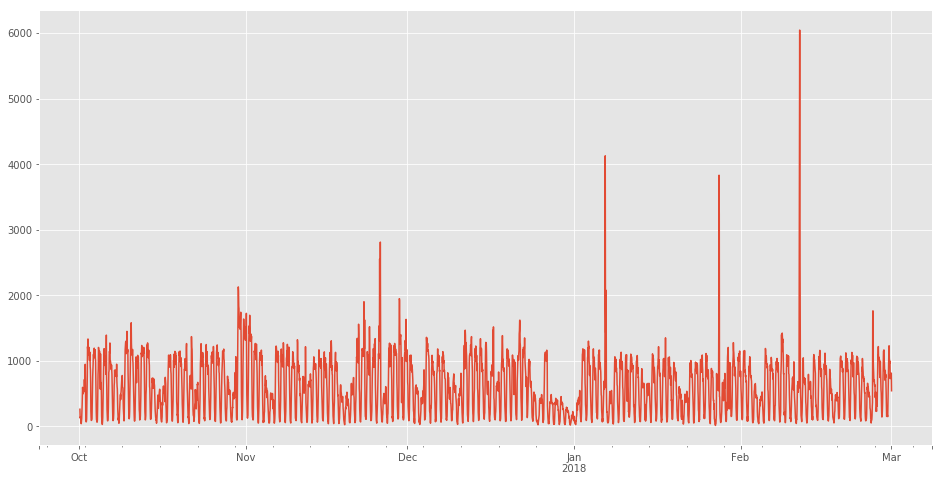

In [8]:
main_ts.plot()

In [9]:
#query por si se quiere especificar el rango de la busqueda
query_range = {
    "query": {
        "range" : {
            "@timestamp" : {
                "gte": "01/01/2018",
                "lte": "02/02/2018",
                "format": "dd/MM/yyyy||yyyy"
            }
        }
    }
}

In [10]:
#query para la serie de un tag especifico (ej sa_Neutro)
query_a_tag = {
  "query": {
    "match": {
      "tag": "sa_Neutro" 
    }
  },
  "aggs": {
    "my_aggregation": {
      "date_histogram": {
        "field":     "@timestamp",
        "interval":  "1H"
      }
    }
  }
}

response = client.search(
    index="movi*",
    size=0,
    body=query_a_tag)

print("Query time: ", response['took'])

#nota: hay que buscar la mejor manera de hacer esto porque parece rebuscado
dates = []
count = []
for element in response['aggregations']['my_aggregation']['buckets']:
    dates.append(pd.to_datetime(element['key_as_string']))
    count.append(element['doc_count'])
    
tag_ts = pd.Series(count, index=dates)
tag_ts.head()

Query time:  1218


2017-10-01 03:00:00    56
2017-10-01 04:00:00    25
2017-10-01 05:00:00    33
2017-10-01 06:00:00    27
2017-10-01 07:00:00    20
dtype: int64

In [ ]:
{
'query': {
    'bool': {
        'filter': [{
            'range': {
                '@timestamp': {
                    'gte': '2018-07-11T03:00:00.000Z', 
                    'lte': '2018-08-17T03:00:00.000Z'}
                }
            }]
        }
    }, 
    'aggs': {
        'my_aggregation': {
            'date_histogram': {
                'interval': '1H', 
                'field': '@timestamp'}
            }
    }
}

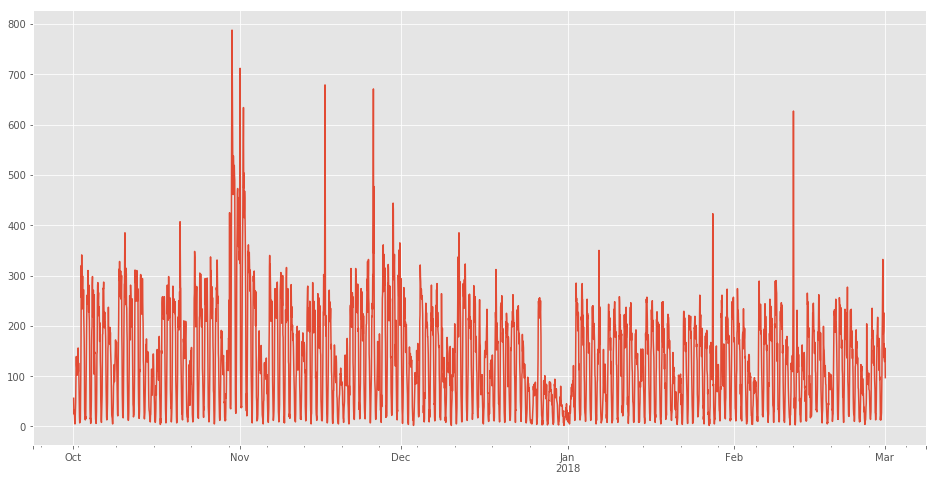

In [11]:
tag_ts.plot()